✅ Loaded last 5 transaction history
✅ Model trained using last 5 transactions

--- 🔍 CURRENT TRANSACTION CHECK ---
Transaction: ₹5000 at 14:00 → 🟢 Normal


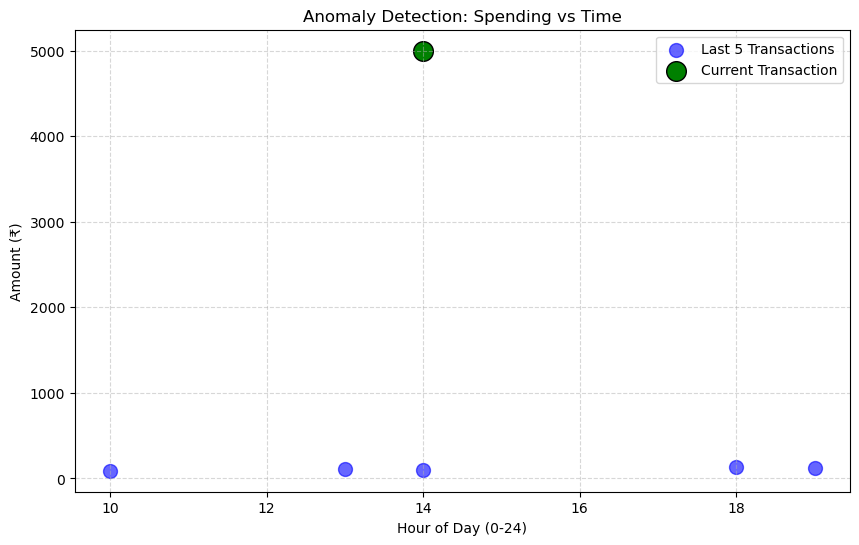

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ==========================================
# 1. GENERATE MOCK USER HISTORY (Training Data)
# ==========================================
# We simulate a "Student" profile:
# - Spends small amounts (avg ₹100)
# - Active during the day (8 AM - 10 PM)
np.random.seed(42)

n_samples = 200
# Normal amounts: Gaussian distribution around ₹100
past_amounts = np.random.normal(loc=100, scale=20, size=n_samples)
# Normal hours: Random integers between 8 AM (8) and 10 PM (22)
past_hours = np.random.randint(8, 23, size=n_samples)

# Create the dataframe
history_df = pd.DataFrame({
    'Amount': past_amounts,
    'Hour': past_hours
})

print(f"✅ Generated {n_samples} past transactions for training.")

# ==========================================
# 2. TRAIN THE MODEL
# ==========================================
# contamination=0.05 means we assume ~5% of past data might be noise/outliers
model = IsolationForest(contamination=0.05, random_state=42)

# We train on 'Amount' and 'Hour'
model.fit(history_df[['Amount', 'Hour']])
print("✅ Model successfully learned user behavior.")

# ==========================================
# 3. TEST THE MODEL (Simulation)
# ==========================================
# Let's create 5 new transactions to test the system
new_transactions = [
    {'Amount': 105, 'Hour': 14},   # Case A: Normal Lunch (₹105 at 2 PM)
    {'Amount': 95, 'Hour': 9},     # Case B: Normal Breakfast (₹95 at 9 AM)
    {'Amount': 5000, 'Hour': 14},  # Case C: Huge Expense (Anomaly by Amount)
    {'Amount': 100, 'Hour': 3},    # Case D: 3 AM Spending (Anomaly by Time)
    {'Amount': 120, 'Hour': 20},   # Case E: Normal Dinner
]

test_df = pd.DataFrame(new_transactions)

# Predict: 1 = Normal, -1 = Anomaly
predictions = model.predict(test_df[['Amount', 'Hour']])
test_df['Is_Anomaly'] = predictions

# ==========================================
# 4. VIEW RESULTS & VISUALIZE
# ==========================================
print("\n--- 🔍 LIVE MONITORING RESULTS ---")
for index, row in test_df.iterrows():
    status = "🔴 ANOMALY DETECTED" if row['Is_Anomaly'] == -1 else "🟢 Normal"
    print(f"Transaction: ₹{row['Amount']} at {row['Hour']}:00 \t-> {status}")

# --- PLOTTING ---
plt.figure(figsize=(10, 6))

# 1. Plot the User's "Safe Zone" (Past History)
plt.scatter(history_df['Hour'], history_df['Amount'], c='blue', alpha=0.3, label='Past History (Safe Zone)')

# 2. Plot the New Transactions
# Green for Normal, Red for Anomaly
colors = np.where(test_df['Is_Anomaly'] == 1, 'green', 'red')
plt.scatter(test_df['Hour'], test_df['Amount'], c=colors, s=150, edgecolor='black', label='New Transactions')

plt.title('Anomaly Detection: Spending vs. Time')
plt.xlabel('Hour of Day (0-24)')
plt.ylabel('Amount (₹)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/7a/93/aa8072af4ff37b795f6bbf43dcaf61115f40f49935c7dbb180c9afc3f421/fastapi-0.122.0-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/ee/d9/d88e73ca598f4f6ff671fb5fde8a32925c2e08a637303a1d12883c7305fa/uvicorn-0.38.0-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.51.0,>=0.40.0 from https://files.pythonhosted.org/packages/d9/52/1064f510b141bd54025f9b55105e26d1fa970b9be67ad766380a3c9b74b0/starlette-0.50.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4 from https://files.pythonhosted.org/packages/5a/87/b70ad306ebb6f9b585f114d0ac2137d792b48be34d732d60e597c2f8465a/pydantic-2.12.5-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ------------------ --------------------- 41.0/90

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.11.0 which is incompatible.
selenium 4.33.0 requires typing_extensions~=4.13.2, but you have typing-extensions 4.15.0 which is incompatible.
selenium 4.33.0 requires urllib3[socks]~=2.4.0, but you have urllib3 1.26.16 which is incompatible.


  Obtaining dependency information for typing_extensions==4.12.2 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.11.0 which is incompatible.
pydantic 2.12.5 requires typing-extensions>=4.14.1, but you have typing-extensions 4.12.2 which is incompatible.
pydantic-core 2.41.5 requires typing-extensions>=4.14.1, but you have typing-extensions 4.12.2 which is incompatible.
selenium 4.33.0 requires typing_extensions~=4.13.2, but you have typing-extensions 4.12.2 which is incompatible.
selenium 4.33.0 requires urllib3[socks]~=2.4.0, but you have urllib3 1.26.16 which is incompatible.


ImportError: cannot import name 'Sentinel' from 'typing_extensions' (C:\Users\AKS\anaconda3\Lib\site-packages\typing_extensions.py)

Found existing installation: pydantic 2.12.5
Uninstalling pydantic-2.12.5:
  Successfully uninstalled pydantic-2.12.5
Found existing installation: pydantic_core 2.41.5
Uninstalling pydantic_core-2.41.5:
  Successfully uninstalled pydantic_core-2.41.5
Found existing installation: typing_extensions 4.12.2
Uninstalling typing_extensions-4.12.2:
  Successfully uninstalled typing_extensions-4.12.2


  Obtaining dependency information for typing_extensions==4.12.2 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.122.0 requires pydantic!=1.8,!=1.8.1,!=2.0.0,!=2.0.1,!=2.1.0,<3.0.0,>=1.7.4, which is not installed.
jupyter-server 1.23.4 requires anyio<4,>=3.1.0, but you have anyio 4.11.0 which is incompatible.
selenium 4.33.0 requires typing_extensions~=4.13.2, but you have typing-extensions 4.12.2 which is incompatible.
selenium 4.33.0 requires urllib3[socks]~=2.4.0, but you have urllib3 1.26.16 which is incompatible.


  Obtaining dependency information for pydantic<2.0 from https://files.pythonhosted.org/packages/da/d8/f1aca10d538a0f18d2c99f7e84d3bb5c4abb6bd499272d6c4fc21f39af30/pydantic-1.10.24-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/156.2 kB ? eta -:--:--
     ------- ----------------------------- 30.7/156.2 kB 660.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/156.2 kB 393.8 kB/s eta 0:00:01
     --------------------- --------------- 92.2/156.2 kB 744.7 kB/s eta 0:00:01
     ---------------------------- ------- 122.9/156.2 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ 156.2/156.2 kB 719.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 2.1 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.1 MB 2.0 MB/s eta 0:00:01
   ----- -----

FastAPI working!
